<a href="https://colab.research.google.com/github/bemakerorg/AIoT_Book_RF/blob/main/AIoT_RF_Book_ES_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Esercizio 10 – Eliminazione Overfitting per il Modello Hello World per la Classificazione delle Immagini**

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
# Carica il dataset MNIST
data = tf.keras.datasets.mnist
(training_images, training_labels), (val_images, val_labels) = data.load_data()

# Normalizza i dati delle immagini in un intervallo tra 0 e 1
training_images = training_images / 255.0
val_images = val_images / 255.0

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
# Definisci i layer del modello con regolarizzazione L2 e dropout
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Mostra il sommario del modello
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 109386 (427.29 KB)
Trainable params: 10938

In [ ]:
# Compilazione del modello
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Definisci il callback di early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

In [ ]:
# Allena il modello e salva la cronologia
history = model.fit(training_images, training_labels, epochs=20, validation_data=(val_images, val_labels), callbacks=[early_stopping])

# Valuta il modello sul set di test
val_loss, val_accuracy = model.evaluate(val_images, val_labels)
print(f'Accuratezza sui dati di test: {val_accuracy}')

# Ottieni i dati di accuratezza dalla cronologia
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
epochs = range(1, len(train_accuracy) + 1)

Epoch 1/20
1875/1875 [==============================] - 12s 6ms/step - loss: 0.7695 - accuracy: 0.8256 - val_loss: 0.3685 - val_accuracy: 0.9450
Epoch 2/20
1875/1875 [==============================] - 12s 6ms/step - loss: 0.5083 - accuracy: 0.9046 - val_loss: 0.3261 - val_accuracy: 0.9518
Epoch 3/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4561 - accuracy: 0.9146 - val_loss: 0.3028 - val_accuracy: 0.9524
Epoch 4/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4412 - accuracy: 0.9179 - val_loss: 0.2947 - val_accuracy: 0.9592
Epoch 5/20
1875/1875 [==============================] - 10s 6ms/step - loss: 0.4288 - accuracy: 0.9190 - val_loss: 0.2813 - val_accuracy: 0.9611
Epoch 6/20
1875/1875 [==============================] - 10s 6ms/step - loss: 0.4193 - accuracy: 0.9223 - val_loss: 0.2805 - val_accuracy: 0.9605
Epoch 7/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4122 - accuracy: 0.9233 - val_loss: 0.2737 - val_accu

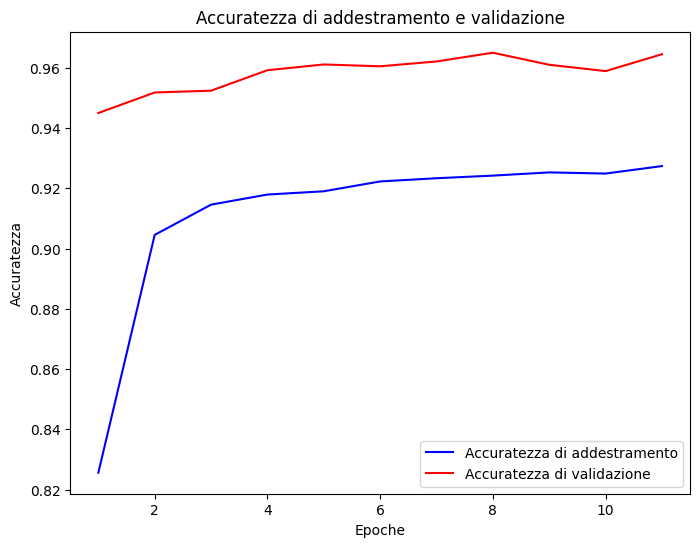

In [ ]:
# Crea il grafico dell'accuratezza
plt.figure(figsize=(8, 6))
plt.plot(epochs, train_accuracy, 'b', label='Accuratezza di addestramento')
plt.plot(epochs, val_accuracy, 'r', label='Accuratezza di validazione')
plt.title('Accuratezza di addestramento e validazione')
plt.xlabel('Epoche')
plt.ylabel('Accuratezza')
plt.legend()
plt.show()

313/313 [==============================] - 1s 2ms/step
Predizioni per l'immagine 325: [1.4448834e-05 3.1935000e-05 9.1573922e-05 6.1407482e-06 9.9326181e-01
 1.1147197e-04 9.6532429e-05 7.1998732e-04 3.8260178e-04 5.2834102e-03]
Etichetta effettiva per l'immagine 325: 4
Classe prevista per l'immagine 325: 4


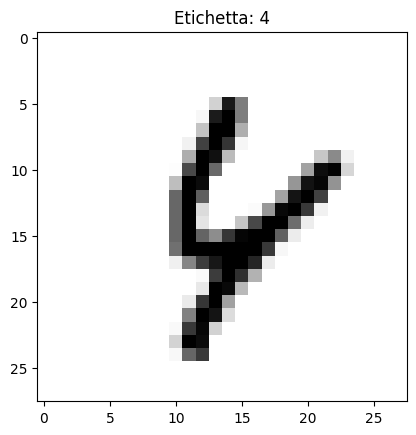

In [ ]:
# Il modello predice le probabilità per ciascuna immagine di validazione
classifications = model.predict(val_images)

# Viene stampata la lista delle probabilità per ciascuna classe per la prima immagine (se i = 0)
i = 325
predicted_label = np.argmax(classifications[i])
actual_label = val_labels[i]
print(f"Predizioni per l'immagine {i}: {classifications[i]}")
print(f"Etichetta effettiva per l'immagine {i}: {actual_label}")
print(f"Classe prevista per l'immagine {i}: {predicted_label}")

# Viene visualizzata l'immagine con l'etichetta reale
plt.imshow(val_images[i], cmap=plt.cm.binary)
plt.title(f"Etichetta: {actual_label}")
plt.show()

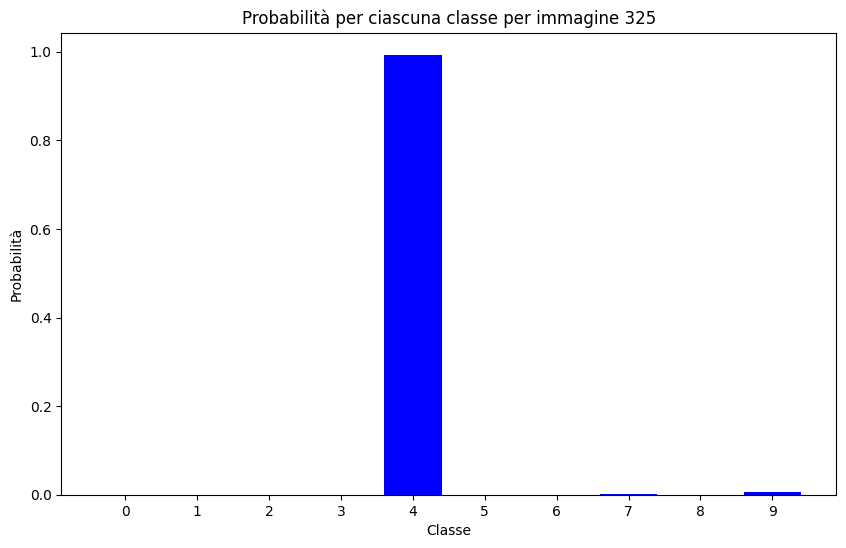

In [ ]:
# Grafico ad istogrammi delle probabilità per ciascuna classe
plt.figure(figsize=(10, 6))
plt.bar(range(10), classifications[i], color='blue')
plt.xlabel('Classe')
plt.ylabel('Probabilità')
plt.title(f'Probabilità per ciascuna classe per immagine {i}')
plt.xticks(range(10))
plt.show()